In [96]:
import random
import numpy as np

def generateSequence(length):
    sequence = []
    while len(sequence) < length:
        sequence.append(random.randint(0, 1))
        sequence.append(1)
        sequence.append(0)
    return sequence[:length]

def generateSubsequences(length):
    # Function to recursively add variations
    def AddVariations(currentSequence):
        if len(currentSequence) >= length:
            return [currentSequence[:length]]
        else:
            # Generate two paths: one with 0 and one with 1, followed by 1 and 0
            nextSequence = []
            for choice in [0, 1]:
                extendedSequence = currentSequence + [choice, 1, 0]
                nextSequence.extend(AddVariations(extendedSequence))
            return nextSequence
    
    # Generate sequences from different starting points
    subsequences1 = AddVariations([1, 0])
    subsequences2 = AddVariations([0])
    subsequences3 = AddVariations([])

    # Combine all sequences and remove duplicates
    combinedSequences = subsequences1 + subsequences2 + subsequences3
    unique_sequences = [list(seq) for seq in set(tuple(seq) for seq in combinedSequences)]
    unique_sequences.sort()
    
    return unique_sequences

def countSubsequences(mainSequence, allSubsequences):

    # Dictionary to hold the count of each subsequence
    subsequenceCounts = {}

    # Iterate over each subsequence in allSubsequences
    for subseq in allSubsequences:
        count = 0  # Initialize count for the current subsequence
        subseqLength = len(subseq)
        
        # Iterate over the mainSequence to find occurrences
        for i in range(len(mainSequence) - subseqLength + 1):
            # Compare slice of mainSequence with the subsequence
            if mainSequence[i:i+subseqLength] == subseq:
                count += 1
        
        # Store the count of the current subsequence
        subsequenceCounts[tuple(subseq)] = count

    # Calculate the total count
    total_count = sum(subsequenceCounts.values())

    # Divide each count by the total count
    for subseq, count in subsequenceCounts.items():
        subsequenceCounts[subseq] = count / total_count

    return subsequenceCounts



Total amount of subsecuences:  3072


In [92]:
BlockEntropyList = []

for length in range(1, 30):
    allSubsequences = generateSubsequences(length)
    mainLength = 10**4
    MainSequence = generateSequence(mainLength)

    subsequenceCounts = countSubsequences(MainSequence, allSubsequences)

    blockEntropy = 0
    for subseq, count in subsequenceCounts.items():
        if count > 0:
            blockEntropy += count * np.log2(1/count)

    BlockEntropyList.append(blockEntropy)

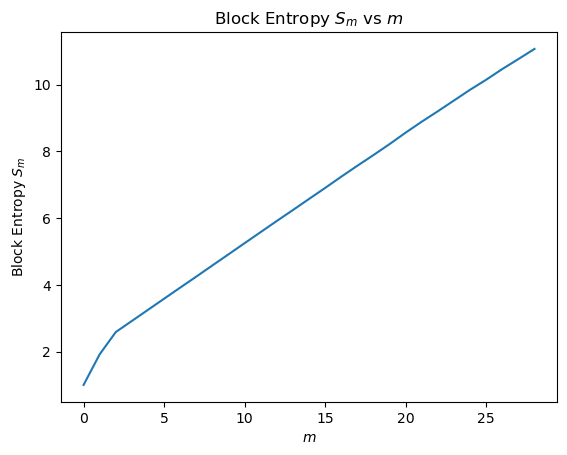

In [95]:
# plot Blockentropy vs length
import matplotlib.pyplot as plt
plt.plot(BlockEntropyList)
plt.xlabel('$m$')
plt.ylabel('Block Entropy $S_m$')
plt.title('Block Entropy $S_m$ vs $m$')


#save plot as svg
plt.savefig('block_entropy.svg')
